In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read CSV to make initial df
df_ufo = pd.read_csv('final_data.csv')
df_ufo

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
0,1,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,29.883056,-97.941111,2004-04-27
1,2,1956-10-10 21:00:00,edna,tx,us,circle,20.0,28.978333,-96.645833,2004-01-17
2,3,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,21.418056,-157.803611,2004-01-22
3,4,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,36.595000,-82.188889,2007-04-27
4,5,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,41.117500,-73.408333,1999-10-02
...,...,...,...,...,...,...,...,...,...,...
65109,65110,2013-09-09 21:15:00,nashville,tn,us,light,600.0,36.165833,-86.784444,2013-09-30
65110,65111,2013-09-09 22:00:00,boise,id,us,circle,1200.0,43.613611,-116.202500,2013-09-30
65111,65112,2013-09-09 22:00:00,napa,ca,us,other,1200.0,38.297222,-122.284444,2013-09-30
65112,65113,2013-09-09 22:20:00,vienna,va,us,circle,5.0,38.901111,-77.265556,2013-09-30


In [3]:
# Check datatypes.
df_ufo.dtypes

ID                    int64
datetime             object
city                 object
state                object
country              object
shape                object
duration_seconds    float64
latitude            float64
longitude           float64
date_posted          object
dtype: object

In [4]:
# Fix datatypes.
df_ufo['datetime'] = pd.to_datetime(df_ufo['datetime'])
df_ufo['date_posted'] = pd.to_datetime(df_ufo['date_posted'])

In [5]:
# Check datatypes again.
df_ufo.dtypes

ID                           int64
datetime            datetime64[ns]
city                        object
state                       object
country                     object
shape                       object
duration_seconds           float64
latitude                   float64
longitude                  float64
date_posted         datetime64[ns]
dtype: object

In [6]:
# Find the average and median duration of observations.
average_duration = df_ufo["duration_seconds"].mean()
median_duration = df_ufo["duration_seconds"].median()
print(f"Average duration: {average_duration} seconds")
print(f"Median duration: {median_duration} seconds")

Average duration: 5800.014047363085 seconds
Median duration: 180.0 seconds


In [7]:
# Sort values by longest and shortest durations.
longest_obs = df_ufo.sort_values(by=["duration_seconds"], ascending=False)
display(longest_obs.head())

shortest_obs = df_ufo.sort_values(by=["duration_seconds"], ascending=True)
display(shortest_obs.head())

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
60480,60481,1991-09-15 18:00:00,greenbrier,ar,us,light,66276000.0,35.233889,-92.387500,2008-03-31
52325,52326,2012-08-10 21:00:00,finley,wa,us,light,52623200.0,46.154167,-119.032778,2012-08-19
56117,56118,2002-08-24 01:00:00,englewood,fl,us,light,52623200.0,26.961667,-82.352778,2002-08-28
57680,57681,2008-08-03 21:00:00,virginia beach,va,us,fireball,10526400.0,36.852778,-75.978333,2008-08-12
25229,25230,1994-03-01 01:00:00,menifee,ca,us,unknown,10526400.0,33.728333,-117.145556,2005-02-22


,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
34792,34793,1987-05-15 23:00:00,island lake,il,us,light,0.01,42.276111,-88.191944,2012-01-12
46079,46080,1974-07-15 22:00:00,bridgeview,il,us,triangle,0.01,41.750000,-87.804167,2004-01-17
19658,19659,1999-12-09 18:15:00,lyle,wa,us,fireball,0.01,45.696111,-121.285000,1999-12-16
57057,57058,2002-08-29 23:45:00,toledo,or,us,triangle,0.01,44.621667,-123.937222,2002-09-06
11158,11159,2001-11-28 03:41:00,milwaukie,or,us,fireball,0.02,45.446389,-122.638056,2001-12-05


In [8]:
# Create a new year column for grouping
df_ufo['year'] = df_ufo['datetime'].dt.year

In [9]:
# Group by year and find out which years had the most sightings.
most_active_years = df_ufo.groupby('year').count()
most_active_years = most_active_years["ID"]
most_active_years = most_active_years.sort_values(ascending=False)
display(most_active_years.head(10))


year
2012    6322
2013    6054
2011    4379
2008    4017
2009    3677
2010    3548
2007    3470
2004    3244
2005    3228
2003    2958
Name: ID, dtype: int64

In [10]:
# Group by year and find out which years had the least sightings.
least_active_years = df_ufo.groupby('year').count()
least_active_years = least_active_years["ID"]
least_active_years = least_active_years.sort_values(ascending=True)
display(least_active_years.head(10))

year
1920    1
1925    1
1929    1
1934    1
1936    1
1941    1
1943    1
1910    2
1931    2
1937    2
Name: ID, dtype: int64

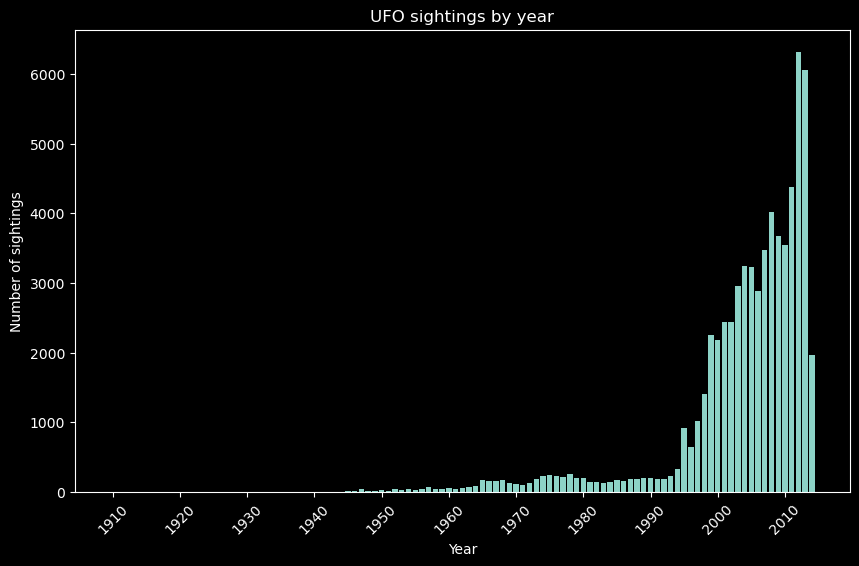

In [11]:
# Graph the sightings by year
sightings_by_year = df_ufo.groupby('year').count()
sightings_by_year = sightings_by_year["ID"]

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_year.index, sightings_by_year.values)

# Customize x-axis ticks to show only every decade
plt.xticks(range(sightings_by_year.index[0], sightings_by_year.index[-1] + 1, 10), \
           range(sightings_by_year.index[0], sightings_by_year.index[-1] + 1, 10), rotation=45)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of sightings')
plt.title('UFO sightings by year')

# Show the plot
plt.show()

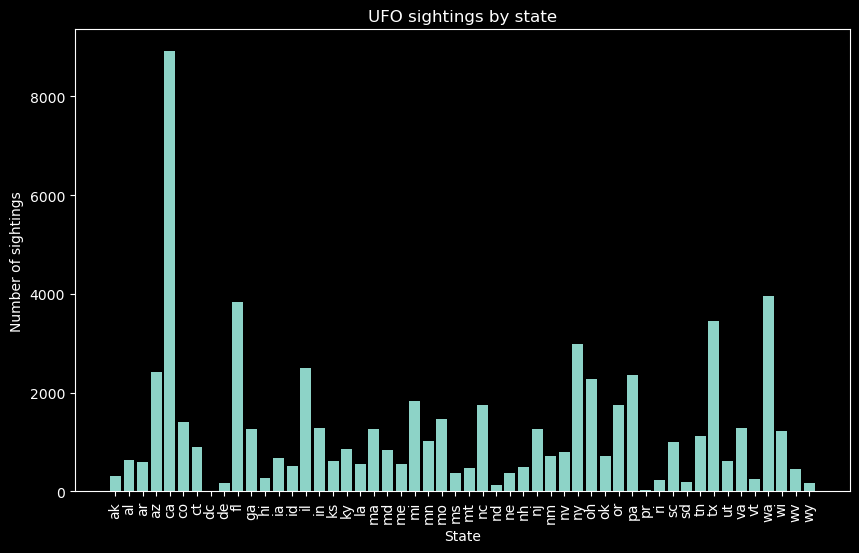

In [12]:
# Graph the sightings by state
sightings_by_state = df_ufo.groupby('state').count()
sightings_by_state = sightings_by_state["ID"]

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_state.index, sightings_by_state.values)

# Customize x-axis ticks to show only every decade
plt.xticks(rotation = 90)

# Set labels and title
plt.xlabel('State')
plt.ylabel('Number of sightings')
plt.title('UFO sightings by state')

# Show the plot
plt.show()

In [13]:
# Top cities for UFO sightings
sightings_by_city = df_ufo.groupby("city").count()
sightings_by_city = sightings_by_city["ID"].sort_values(ascending=False)
sightings_by_city.head(10)

city
seattle        524
phoenix        454
portland       373
las vegas      367
los angeles    352
san diego      338
houston        297
chicago        264
tucson         241
miami          239
Name: ID, dtype: int64

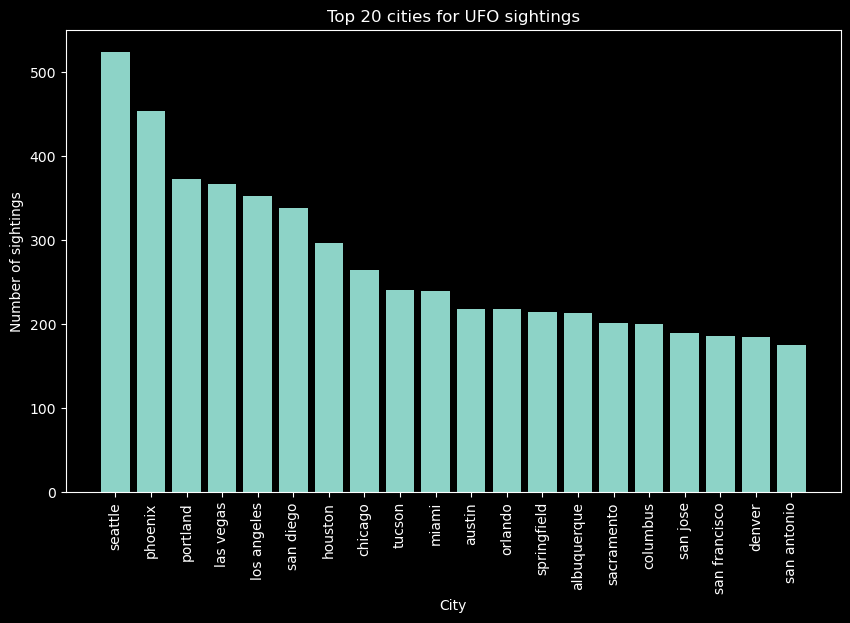

In [14]:
# Graph top 20 cities for UFO sightings

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_city.index[:20], sightings_by_city.values[:20])

# Customize x-axis ticks to show only every decade
plt.xticks(rotation = 90)

# Set labels and title
plt.xlabel('City')
plt.ylabel('Number of sightings')
plt.title('Top 20 cities for UFO sightings')

# Show the plot
plt.show()

In [15]:
# Top shapes spotted in UFO sightings
sightings_by_shape = df_ufo.groupby("shape").count()
sightings_by_shape = sightings_by_shape["ID"].sort_values(ascending=False)
sightings_by_shape.head(10)

shape
light        13473
triangle      6549
circle        6118
fireball      5148
unknown       4567
other         4466
sphere        4347
disk          4121
oval          3032
formation     1990
Name: ID, dtype: int64

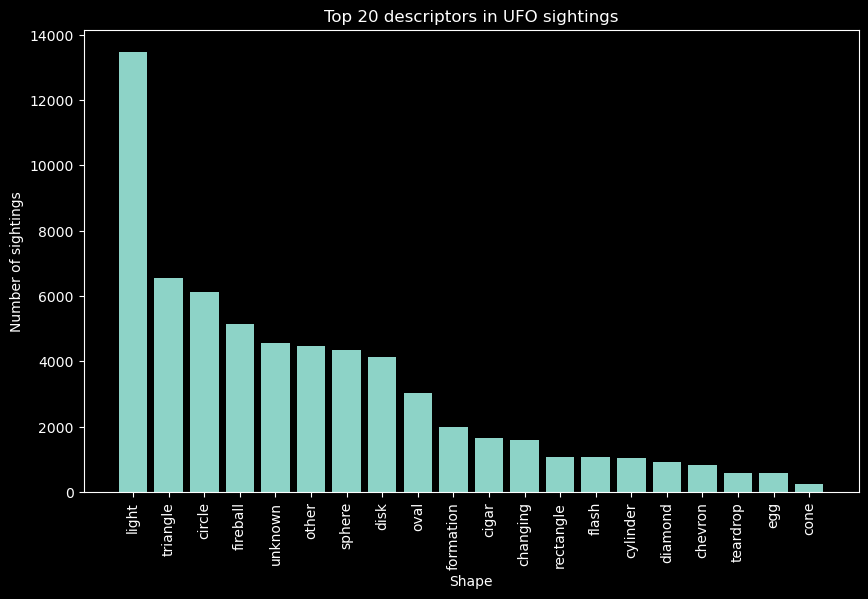

In [16]:
# Graph top 20 shapes for UFO sightings

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_shape.index[:20], sightings_by_shape.values[:20])

# Customize x-axis ticks to show only every decade
plt.xticks(rotation = 90)

# Set labels and title
plt.xlabel('Shape')
plt.ylabel('Number of sightings')
plt.title('Top 20 descriptors in UFO sightings')

# Show the plot
plt.show()

In [17]:
# Find specifically Roswell data.

roswell_sightings = df_ufo.loc[(df_ufo['city'] == 'roswell') & (df_ufo['state'] == 'nm')].sort_values(by="datetime", ascending=True).reset_index()
roswell_count = roswell_sightings["ID"].count()
print(roswell_count)
display(roswell_sightings.head(roswell_count))


27


,index,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year
0,15163,15164,1945-12-15 02:00:00,roswell,nm,us,sphere,60.0,33.394167,-104.5225,2002-12-23,1945
1,44711,44712,1947-07-11 23:59:00,roswell,nm,us,NaN,2400.0,33.394167,-104.5225,2004-06-18,1947
2,39690,39691,1953-06-15 23:59:00,roswell,nm,us,NaN,14400.0,33.394167,-104.5225,2001-02-18,1953
3,53693,53694,1959-08-15 15:00:00,roswell,nm,us,unknown,2700.0,33.394167,-104.5225,2006-12-07,1959
4,38828,38829,1989-06-01 23:00:00,roswell,nm,us,NaN,14400.0,33.394167,-104.5225,2011-01-05,1989
5,26021,26022,1998-03-15 00:00:00,roswell,nm,us,triangle,60.0,33.394167,-104.5225,2009-04-14,1998
6,59170,59171,1998-09-11 00:00:00,roswell,nm,us,diamond,5.0,33.394167,-104.5225,1998-09-26,1998
7,18930,18931,2000-12-06 18:16:00,roswell,nm,us,triangle,360.0,33.394167,-104.5225,2002-01-11,2000
8,46991,46992,2001-07-18 21:00:00,roswell,nm,us,chevron,120.0,33.394167,-104.5225,2001-08-05,2001
9,54028,54029,2001-08-15 22:00:00,roswell,nm,us,triangle,240.0,33.394167,-104.5225,2003-10-31,2001


In [18]:
# Trying to find a specific encounter.

march94 = df_ufo.loc[(df_ufo["datetime"].dt.month == 3) & (df_ufo["datetime"].dt.year == 1994)].sort_values(by="datetime", ascending=True)
march94

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year
25229,25230,1994-03-01 01:00:00,menifee,ca,us,unknown,10526400.0,33.728333,-117.145556,2005-02-22,1994
27047,27048,1994-03-02 23:15:00,lindsborg,ks,us,triangle,10.0,38.573611,-97.674167,2006-07-16,1994
28416,28417,1994-03-03 00:00:00,albany,ny,us,rectangle,21600.0,42.652500,-73.756667,2012-04-18,1994
28417,28418,1994-03-03 23:00:00,moab (south of),ut,us,triangle,60.0,38.573333,-109.549167,2001-08-05,1994
29065,29066,1994-03-08 19:15:00,seattle (university district),wa,us,fireball,5.0,47.606389,-122.330833,2007-02-01,1994
29191,29192,1994-03-09 21:00:00,canton,mi,us,unknown,120.0,42.308611,-83.482222,2007-04-27,1994
24896,24897,1994-03-10 18:00:00,whittier,ca,us,circle,300.0,33.979167,-118.031944,2000-07-11,1994
24897,24898,1994-03-10 18:00:00,wyoming,mi,us,disk,60.0,42.913333,-85.705278,2006-05-15,1994
24898,24899,1994-03-10 21:00:00,olympia,wa,us,oval,10.0,47.038056,-122.899444,2004-01-17,1994
24899,24900,1994-03-10 22:30:00,mesa (north of),az,us,triangle,90.0,33.422222,-111.821944,1999-04-02,1994


In [19]:
# Find most recent entries into the data.

most_recent = df_ufo.sort_values("datetime", ascending=False).reset_index()
most_recent.head()

,index,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year
0,37940,37941,2014-05-08 00:00:00,memphis,tn,us,rectangle,900.0,35.149444,-90.048889,2014-05-08,2014
1,37817,37818,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360.0,38.232222,-90.562778,2014-05-08,2014
2,37816,37817,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300.0,41.485833,-73.051111,2014-05-08,2014
3,37815,37816,2014-05-07 21:00:00,theodore,al,us,circle,120.0,30.547500,-88.175278,2014-05-08,2014
4,37814,37815,2014-05-07 20:30:00,visalia,ca,us,fireball,180.0,36.330278,-119.291111,2014-05-08,2014


In [21]:
# Find the oldest entries in the data.
sorted_by_date = df_ufo.sort_values("datetime", ascending=True).reset_index()
sorted_by_date.head()

,index,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year
0,8861,8862,1910-01-01 23:59:00,kirksville (near),mo,us,disk,120.0,40.194722,-92.583056,2005-09-15,1910
1,38374,38375,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,32.709167,-96.008056,2005-04-16,1910
2,38247,38248,1920-06-11 21:00:00,cicero,in,us,unknown,60.0,40.123889,-86.013333,2009-05-12,1920
3,17360,17361,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,41.420833,-90.015000,2005-05-11,1925
4,51007,51008,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,43.642500,-118.627500,2002-08-16,1929


In [20]:
# Sightings only after 2000.

before2000 = df_ufo.loc[df_ufo["datetime"].dt.year < 2000].sort_values("datetime", ascending=False).reset_index()
before2000.head()

,index,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year
0,17766,17767,1999-12-31 23:59:00,bellflower,ca,us,fireball,960.0,33.881667,-118.116111,2000-01-07,1999
1,17765,17766,1999-12-31 23:42:00,santee,ca,us,formation,60.0,32.838333,-116.973056,2000-01-07,1999
2,17764,17765,1999-12-31 23:30:00,rockford,il,us,light,300.0,42.271111,-89.093889,2000-03-16,1999
3,17763,17764,1999-12-31 23:20:00,loves park,il,us,circle,60.0,42.320000,-89.058056,2000-01-22,1999
4,17762,17763,1999-12-31 20:30:00,dover,fl,us,circle,10.0,27.993889,-82.219722,2000-05-03,1999
